## Option Pricing and Greeks Calculator

### Setup

In [1]:
# Import necessary libraries
import numpy as np
from scipy.stats import norm

# Constants
PI = np.pi

### Utility Functions

In [2]:
# Generate Gaussian noise
def generate_gaussian_noise(mean=0.0, stddev=1.0, size=1):
    return np.random.normal(mean, stddev, size)

# Black-Scholes Formula
def black_scholes_price(S, K, r, sigma, T, is_call=True):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    if is_call:
        return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    else:
        return K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


### Monte Carlo Simulation

In [3]:
def monte_carlo_option_pricing(S0, K, r, sigma, T, num_simulations, is_call=True):
    payoffs = []
    for _ in range(num_simulations):
        ST = S0 * np.exp((r - 0.5 * sigma**2) * T + sigma * np.sqrt(T) * generate_gaussian_noise()[0])
        payoff = max(ST - K, 0) if is_call else max(K - ST, 0)
        payoffs.append(payoff)
    discounted_payoff = np.exp(-r * T) * np.mean(payoffs)
    return discounted_payoff


### Calculate Greeks

In [4]:
def calculate_greeks(S, K, r, sigma, T, is_call=True, h=0.01):
    # Base price
    base_price = black_scholes_price(S, K, r, sigma, T, is_call)

    # Delta
    delta = (black_scholes_price(S + h, K, r, sigma, T, is_call) - 
             black_scholes_price(S - h, K, r, sigma, T, is_call)) / (2 * h)

    # Gamma
    gamma = (black_scholes_price(S + h, K, r, sigma, T, is_call) - 
             2 * base_price + 
             black_scholes_price(S - h, K, r, sigma, T, is_call)) / (h**2)

    # Theta
    theta = (black_scholes_price(S, K, r, sigma, T - h / 365, is_call) - 
             base_price) / (h / 365)

    # Vega
    vega = (black_scholes_price(S, K, r, sigma + h, T, is_call) - 
            base_price) / h

    # Rho
    rho = (black_scholes_price(S, K, r + h, sigma, T, is_call) - 
           base_price) / h

    return {"Delta": delta, "Gamma": gamma, "Theta": theta, "Vega": vega, "Rho": rho}


### Main Execution Cell

In [5]:
# Parameters
S0 = 100.0  # Initial stock price
K = 100.0   # Strike price
r = 0.05    # Risk-free rate
sigma = 0.2 # Volatility
T = 1.0     # Time to maturity
num_simulations = 100000

# Calculate European Option Prices
bs_call_price = black_scholes_price(S0, K, r, sigma, T, True)
bs_put_price = black_scholes_price(S0, K, r, sigma, T, False)
mc_call_price = monte_carlo_option_pricing(S0, K, r, sigma, T, num_simulations, True)
mc_put_price = monte_carlo_option_pricing(S0, K, r, sigma, T, num_simulations, False)

# Greeks
call_greeks = calculate_greeks(S0, K, r, sigma, T, True)
put_greeks = calculate_greeks(S0, K, r, sigma, T, False)

# Output Results
print("European Call Option Prices:")
print(f"  Black-Scholes: {bs_call_price}")
print(f"  Monte Carlo: {mc_call_price}")

print("\nEuropean Put Option Prices:")
print(f"  Black-Scholes: {bs_put_price}")
print(f"  Monte Carlo: {mc_put_price}")

print("\nCall Option Greeks:")
for greek, value in call_greeks.items():
    print(f"  {greek}: {value}")

print("\nPut Option Greeks:")
for greek, value in put_greeks.items():
    print(f"  {greek}: {value}")


European Call Option Prices:
  Black-Scholes: 10.450583572185565
  Monte Carlo: 10.439341868035166

European Put Option Prices:
  Black-Scholes: 5.573526022256971
  Monte Carlo: 5.622266345268301

Call Option Greeks:
  Delta: 0.6368306425763137
  Gamma: 0.018762017077733617
  Theta: -6.414056291621506
  Vega: 37.570374206513435
  Rho: 53.896558044043275

Put Option Greeks:
  Delta: -0.36316935742419787
  Gamma: 0.018762017077733617
  Theta: -1.6579059116814676
  Vega: 37.570374206513435
  Rho: -40.75235112061151


### Visualization of payoff structure, Greeks.

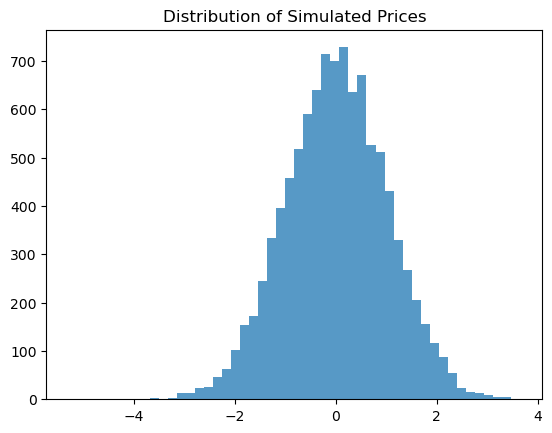

In [6]:
import matplotlib.pyplot as plt

# Example: Visualizing Simulated Paths
plt.hist([generate_gaussian_noise()[0] for _ in range(10000)], bins=50, alpha=0.75)
plt.title("Distribution of Simulated Prices")
plt.show()
